#### Testeo Modelos 
En este sección vamos a realizar testeos de los diferentes modelos que se guardaron.

Recorda que hicimos entrenamiento por separado. Por un lado tenemos un entrenamiento basado solo en 
latitudes y longitudes, es decir un modelo de predicción de latitudes y longitudes, y por otro lado se tiene un modelo dedicado solo a la prediccion de las alturas. 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils_nn as utlnn

In [13]:
x_test = pd.read_csv("./Train_Test/x_test.csv")
y_test = pd.read_csv("./Train_Test/y_test.csv")

In [14]:
autoencoder_Lat_Lon = tf.keras.models.load_model('modelos_entrenamiento/entrenamiento_lat_lon2.keras')
autoencoder_Height = tf.keras.models.load_model('modelos_entrenamiento/entrenamiento_alturas2.keras')

In [15]:
# Predecimos una muestra en particular de mi df
idx = 10 
#=====Latitudes Longitudes=====
y_pred_lat_lon = autoencoder_Lat_Lon.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
y_true =y_test.iloc[idx]
# Separamos Latitudes Longitudes
y_true_latitudes = y_true[0:100]
y_true_longitudes = y_true[100:200]
y_pred_latitudes = y_pred_lat_lon[0,0:100]
y_pred_longitudes = y_pred_lat_lon[0,100:200]

#====== Alturas =======
y_pred_heights = autoencoder_Height.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
y_pred_heights = y_pred_heights[0,0:100]
y_true_heights = y_true[200:300]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


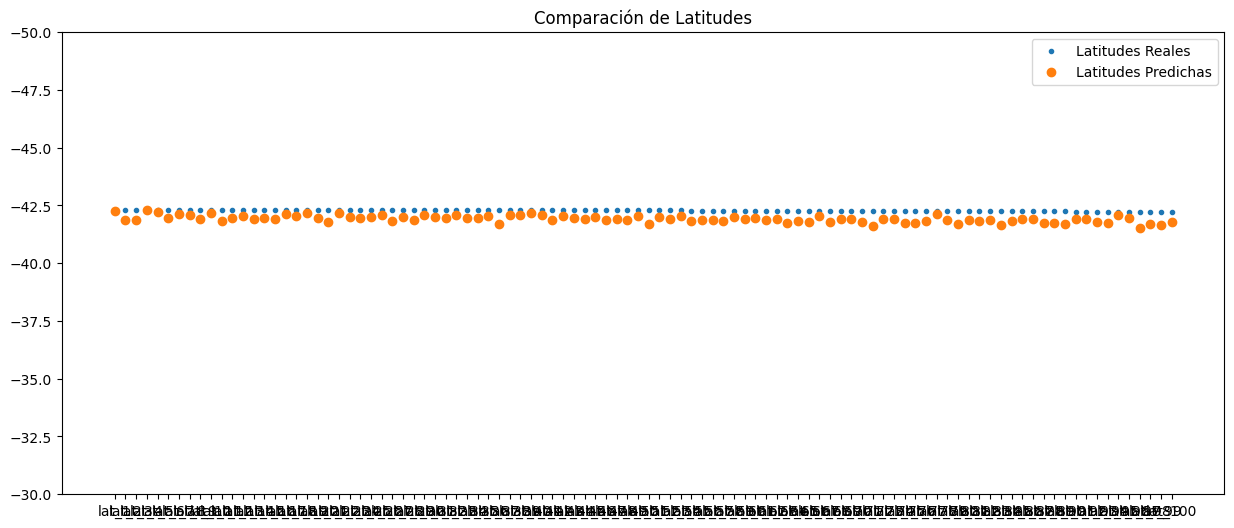

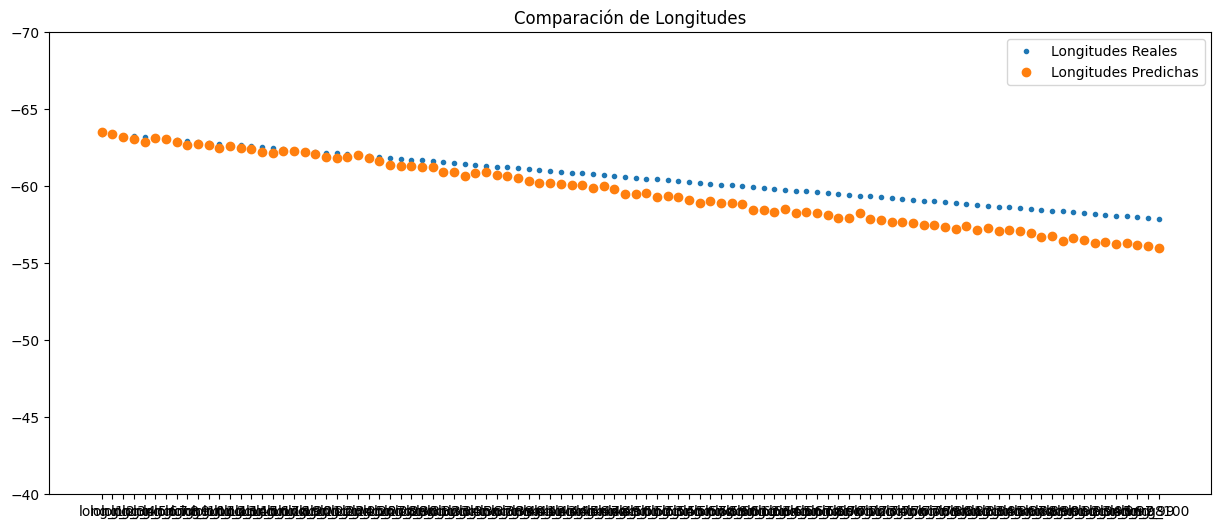

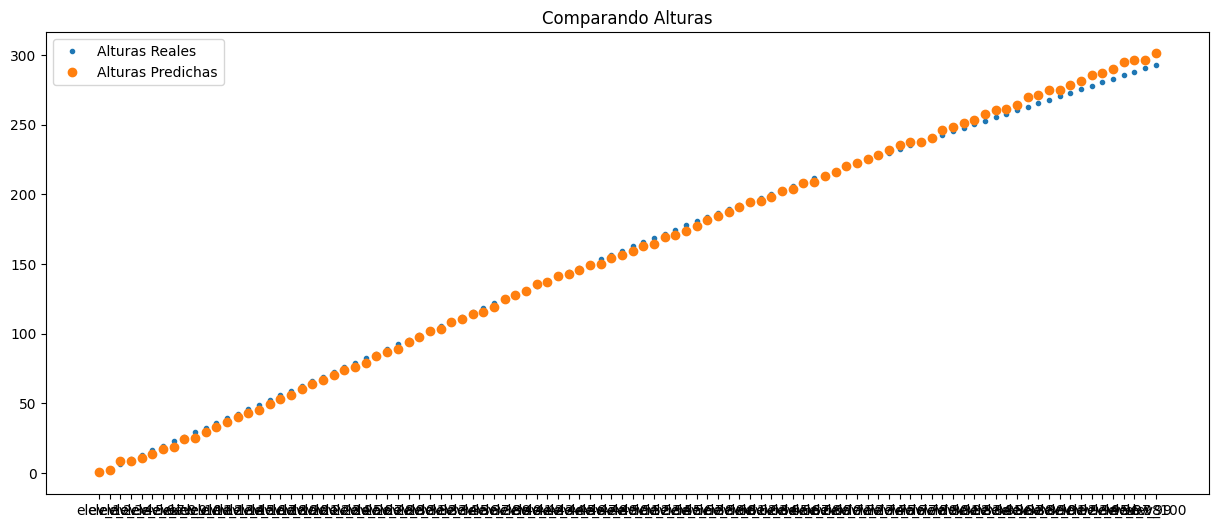

In [16]:
# Grafica Latitudes 
plt.figure(figsize = (15,6))
plt.plot(y_true_latitudes, label = 'Latitudes Reales', linestyle = 'None', marker = '.')
plt.plot(y_pred_latitudes, label = 'Latitudes Predichas', linestyle = 'None', marker = 'o')
plt.ylim(-30,-50)
plt.title('Comparación de Latitudes')
plt.legend()
plt.show()

# Graf. Longitudes
plt.figure(figsize=(15,6))
plt.plot(y_true_longitudes,label= 'Longitudes Reales', linestyle = 'None',marker= '.')
plt.plot(y_pred_longitudes,label= 'Longitudes Predichas', linestyle = 'None', marker = 'o')
plt.ylim(-40,-70)
plt.title("Comparación de Longitudes")
plt.legend()
plt.show()

# Graf. Alturas
plt.figure(figsize=(15,6))
plt.plot(y_true_heights, label = "Alturas Reales",linestyle= 'None', marker = '.')
plt.plot(y_pred_heights, label = "Alturas Predichas", linestyle = 'None', marker = 'o')
plt.title("Comparando Alturas")
plt.legend()
plt.show()

## Errores 
1. Error de manera individual:
  * Puedo calcular $d_{2D}$ usando **geopy.distance.geodesic**.
  * Luego calcular la diferencia de alturas $\Delta z$
  * Finalmente usar un $d_{3D} = \sqrt{(d_{2D})^2 + (\Delta z)^2}$ y así obtendría mi distancia en 3D.
2. ECM
  * Para obtener el Error Cuadrático Medio puedo, sumar los valores y dividir por la cantidad de puntos (100 puntos)
3. RECM(RMSE)
  * Por último se podría tomar la raiz del ECM para expresar el error promedio en metros.

In [17]:
Distance_havers = utlnn.haversine_distance(y_true_latitudes,y_true_longitudes,y_pred_latitudes,y_pred_longitudes)

In [18]:
plot = False
# Calculamos el error 
error = np.sum(Distance_havers**2)/len(Distance_havers)
print("Raiz del ECM:",np.sqrt(error))

if plot == True:
  plt.figure(figsize=(15,6))
  plt.bar(range(len(Distance_havers)), Distance_havers, color='skyblue')
  plt.xlabel('Índice')
  plt.ylabel('Error (distancia)')
  plt.title('Errores como distancias')
  plt.show()

Raiz del ECM: 100.992827922545


In [19]:
distance = utlnn.distances_by_geodesic(y_true_latitudes,y_true_longitudes,y_pred_latitudes,y_pred_longitudes) #Km
print(f"distancia 2D: {distance[99]}")
sq_distance = distance**2
error_2d = np.sum(sq_distance)/len(sq_distance) #ECM
sqrt_error_2d = np.sqrt(error_2d)
print("Raiz del error ECM:",sqrt_error_2d)


distancia 2D: 162.52372712087538
Raiz del error ECM: 101.19341428953206


In [20]:
plot1 = False
if plot1 == True:
  plt.figure(figsize=(15,6))
  plt.bar(range(len(distance)), distance, color='skyblue')
  plt.xlabel('Índice')
  plt.ylabel('Error (distancia)')
  plt.title('Errores como distancias 3D Km')
  plt.show()

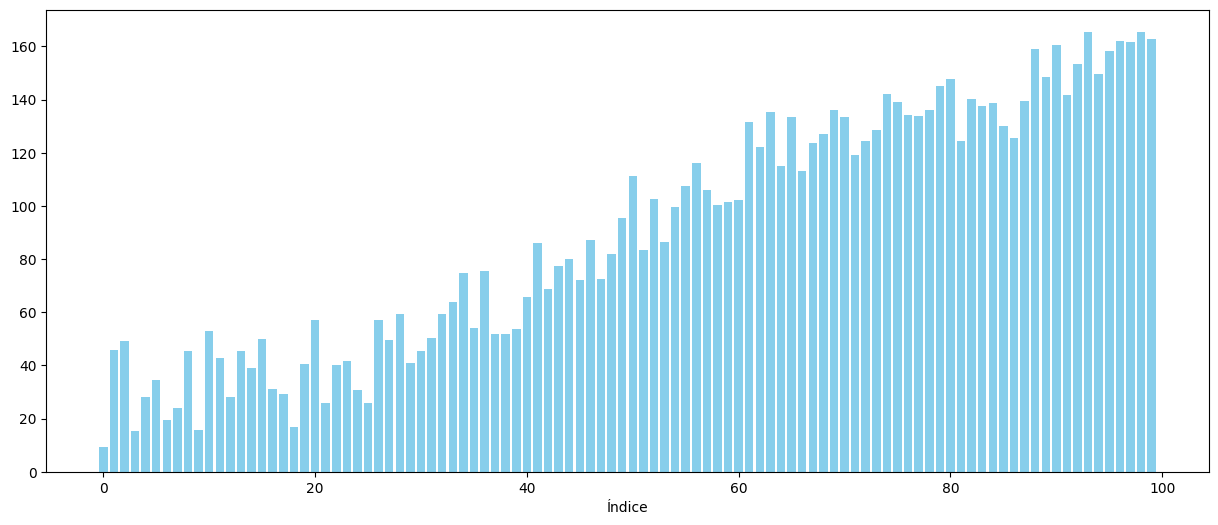

In [21]:
distance_3d = utlnn.distances_3D(distance,y_true_heights,y_pred_heights)   
plt.figure(figsize=(15,6))
plt.bar(range(len(distance_3d)), distance_3d, color='skyblue')
plt.xlabel('Índice')
plt.show()